In [7]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor



In [40]:
# import data
df = pd.read_csv('processed.csv')

# drop unnecessary columns
df.drop(labels=["index","pha"], axis=1, inplace=True)

# replace Y/N with 1/0
df['neo'] = df['neo'].map({'Y': 1, 'N': 0})

# type cast data
df = df.astype(float)

# remove outliers
for column in df:
    if column not in ["orbit_condition_code","diameter","neo"]:
        df=df[(np.abs(stats.zscore(df[column])) < 3)]

temp = df[df["albedo"] > 0]

# normalize data
def min_max_scaling(column):
    return (column-column.min())/(column.max()-column.min())
for column in df.columns:
    if column != 'diameter':
        df[column]=min_max_scaling(df[column])

# shuffle dataframe
df = df.sample(frac = 1)

Y=df["diameter"]
X = df.drop(labels='diameter',axis=1)

# split dataframe into train and test
split_index = int(df.shape[0] * 0.8)
df_train = df.iloc[:split_index]
df_test = df.iloc[split_index:]

# split train and test into X and Y
Y_train = df_train['diameter']
Y_test = df_test['diameter']
X_train = df_train.drop(labels='diameter',axis=1)
X_test = df_test.drop(labels='diameter',axis=1)

c:\Users\riana\anaconda3\envs\NLP\lib\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
# fit multi-layer perceptron regressor
model=MLPRegressor(learning_rate_init=0.002, max_iter=300)
model.fit(X_train, Y_train)

MLPRegressor(learning_rate_init=0.002, max_iter=300)

In [10]:
# Accuracy metrics on test data
mae = metrics.mean_absolute_error(Y_test, model.predict(X_test))
mse = metrics.mean_squared_error(Y_test, model.predict(X_test))
rsq = metrics.r2_score(Y_test, model.predict(X_test))
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", rsq)

Ypred = model.predict(X_test)
MLPPred=Ypred

Mean Absolute Error: 0.3116302666556989
Mean Squared Error: 0.2542234600756082
R2 Score: 0.9622227104158334


Text(0, 0.5, 'Diameter: Predicted value')

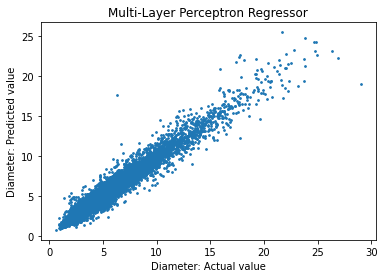

In [9]:
# plot actual values against expected values
x = np.array(Y_test)
y = np.array(Ypred)
plt.scatter(x, y, s=3)
plt.title("Multi-Layer Perceptron Regressor")
plt.xlabel("Diameter: Actual value")
plt.ylabel("Diameter: Predicted value")

In [12]:
# fit random forest regressor to training data
model = RandomForestRegressor(n_estimators=400, max_features=5, max_depth=6)
model.fit(X_train, Y_train)
pred = model.predict(X_test)



In [13]:
# Accuracy metrics on test data
mae = metrics.mean_absolute_error(Y_test, pred)
mse = metrics.mean_squared_error(Y_test, pred)
rsq = metrics.r2_score(Y_test, pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", rsq)

Mean Absolute Error: 0.49315365706867126
Mean Squared Error: 0.4944340661007907
R2 Score: 0.9254381980372358


0.4944340661007907


Text(0, 0.5, 'Diameter: Predicted value')

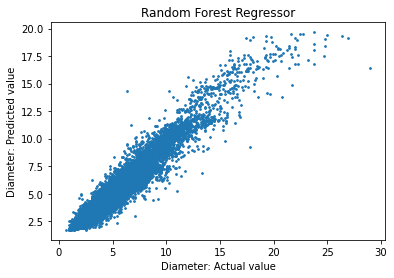

In [14]:
# plot actual values against expected values
x = np.array(Y_test)
y = np.array(pred)
print(metrics.mean_squared_error(x, y))
plt.scatter(x, y, s=3)
plt.title("Random Forest Regressor")
plt.xlabel("Diameter: Actual value")
plt.ylabel("Diameter: Predicted value")

In [15]:
# Linear regression model
lr=LinearRegression()

# training
lr.fit(X_train,Y_train)

# predicting
Y_prediction_lr=lr.predict(X_test)



In [16]:
# Accuracy metrics on test data
mae = metrics.mean_absolute_error(Y_test, Y_prediction_lr)
mse = metrics.mean_squared_error(Y_test, Y_prediction_lr)
rsq = metrics.r2_score(Y_test, Y_prediction_lr)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", rsq)

Mean Absolute Error: 0.7321318891868375
Mean Squared Error: 1.192283822631112
R2 Score: 0.8202008389763614


Text(0, 0.5, 'Diameter: Predicted value')

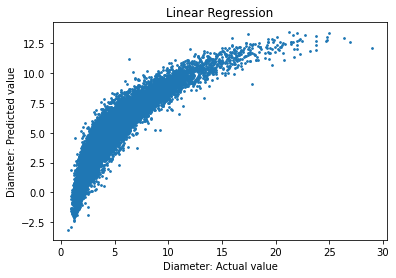

In [17]:
# plot actual values against expected values
x = np.array(Y_test)
y = np.array(Y_prediction_lr)
plt.scatter(x, y, s=3)
plt.title("Linear Regression")
plt.xlabel("Diameter: Actual value")
plt.ylabel("Diameter: Predicted value")

In [19]:
#import tensorflow as tf

scaler=StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, Y_train)
Y_pred=regressor.predict(X_test)



In [21]:
# Accuracy metrics on test data
mae = metrics.mean_absolute_error(Y_test,Y_pred)
mse = metrics.mean_squared_error(Y_test,Y_pred)
rsq = metrics.r2_score(Y_test,Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", rsq)

Mean Absolute Error: 0.4024596140946218
Mean Squared Error: 0.4076932287732312
R2 Score: 0.9385189171428312


0.4076932287732312


Text(0, 0.5, 'Diameter: Predicted value')

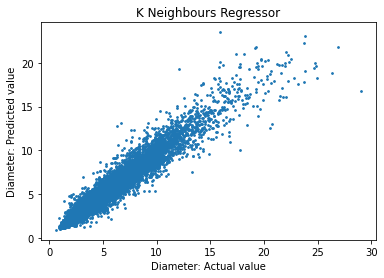

In [22]:
# plot actual values against expected values
x = np.array(Y_test)
y = np.array(Y_pred)
print(metrics.mean_squared_error(x, y))
plt.scatter(x, y, s=3)
plt.title("K Neighbours Regressor")
plt.xlabel("Diameter: Actual value")
plt.ylabel("Diameter: Predicted value")

In [43]:
Y=temp["diameter"]
X = temp.drop(labels='diameter',axis=1)

nasa_diameter = (10 ** (3.1236-0.5*np.log10(X["albedo"]) - 0.2 * X["absolute_magnitude"]))

mae = metrics.mean_absolute_error(Y,nasa_diameter)
mse = metrics.mean_squared_error(Y,nasa_diameter)
rsq = metrics.r2_score(Y,nasa_diameter)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", rsq)

Mean Absolute Error: 0.4083328067236096
Mean Squared Error: 0.4031058770606292
R2 Score: 0.9409221602188128


0.4031058770606292


Text(0, 0.5, 'Diameter: Predicted value')

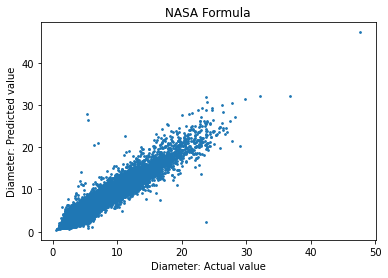

In [44]:
# plot actual values against expected values
x = np.array(Y)
y = np.array(nasa_diameter)
print(metrics.mean_squared_error(x, y))
plt.scatter(x, y, s=3)
plt.title("NASA Formula")
plt.xlabel("Diameter: Actual value")
plt.ylabel("Diameter: Predicted value")